# Natural Language Processing Lecture


### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [4]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Import our metrics to evaluate our model
from sklearn import metrics


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zacharydesario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zacharydesario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zacharydesario/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Import our data
df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)
df.head()


(11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [6]:
print(df.iloc[0]['message'])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







# Check for nulls and dupes

In [7]:
print(df.isnull().sum())

id                0
message           0
topic             0
topic_category    0
dtype: int64


In [8]:
print(df.duplicated().sum())

0


# Check out our class balances


In [9]:
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Feature Engineering
1. Lowercase all words
2. Remove all punctuation.
3. Remove all stopwords. 
4. Stem words

Remember, you can apply a function to a pandas column by using `df.column_name.apply(your_function)`

In [10]:
# Lowercase all words
def make_lower(a_string):
    return a_string.lower()

a_sentence = 'This was A SENTENCE with lower and UPPER CASE.'
make_lower(a_sentence)

'this was a sentence with lower and upper case.'

In [11]:
# Remove all punctuation

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string


a_sentence = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punctuation(a_sentence)

'This is a sentence 50 With lots of punctuation  other things'

In [12]:
def remove_bad_characters(a_string):
    new_string=re.sub('[^a-zA-Z0-9]',' ',a_string)
    cleaned_string=re.sub('\s+',' ',new_string)
    return cleaned_string


remove_bad_characters(a_sentence)

'This is a sentence 50 With lots of punctuation other things '

# What `word_tokenizer` does
The `word_tokenizer` helper function accurately splits your data down into words.  
You could use just `sentence.split(' ')` to split on spaces, however, that does not take into account new-lines or other edge cases. 


In [13]:
a_string = 'This is a sentence!  With lots of punctuation??? & other #things.'
words = word_tokenize(a_string)
' '.join(words)


'This is a sentence ! With lots of punctuation ? ? ? & other # things .'

# Removing stopwords, i dont like anymore.  This is old, and i do not suggest reomving stop words unless there is a specific reason to do so

In [14]:
# Remove all stopwords

def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string
            
a_sentence = 'This is a sentence! With some different stopwords i have added in here.'
remove_stopwords(a_sentence)

'This sentence ! With different stopwords added .'

In [15]:
# stopwords = stopwords.words('english')
# print(stopwords)

In [16]:
## Extra cool stuff. 

In [118]:
## leave this error in here!  this is how you download NLTK things. 
a_sentence = 'This is a sentence! With some different stopwords i have added in here.'
tokens = word_tokenize(a_sentence)
pos_tokens = nltk.pos_tag(tokens)

chunked = nltk.chunk.ne_chunk(pos_tokens)
print(chunked)

(S
  This/DT
  is/VBZ
  a/DT
  sentence/NN
  !/.
  With/IN
  some/DT
  different/JJ
  stopwords/NNS
  i/NNS
  have/VBP
  added/VBN
  in/IN
  here/RB
  ./.)


```python
---------------------------------------------------------------------------
LookupError                               Traceback (most recent call last)
Cell In[15], line 3
      1 a_sentence = 'This is a sentence! With some different stopwords i have added in here.'
----> 3 chunked = nltk.chunk.ne_chunk(a_sentence)
      4 pprint(chunked)

File ~/anaconda3/lib/python3.11/site-packages/nltk/chunk/__init__.py:183, in ne_chunk(tagged_tokens, binary)
    181 else:
    182     chunker_pickle = _MULTICLASS_NE_CHUNKER
--> 183 chunker = load(chunker_pickle)
    184 return chunker.parse(tagged_tokens)

File ~/anaconda3/lib/python3.11/site-packages/nltk/data.py:750, in load(resource_url, format, cache, verbose, logic_parser, fstruct_reader, encoding)
    747     print(f"<<Loading {resource_url}>>")
    749 # Load the resource.
--> 750 opened_resource = _open(resource_url)
    752 if format == "raw":
    753     resource_val = opened_resource.read()

File ~/anaconda3/lib/python3.11/site-packages/nltk/data.py:876, in _open(resource_url)
    873 protocol, path_ = split_resource_url(resource_url)
    875 if protocol is None or protocol.lower() == "nltk":
--> 876     return find(path_, path + [""]).open()
    877 elif protocol.lower() == "file":
    878     # urllib might not use mode='rb', so handle this one ourselves:
    879     return find(path_, [""]).open()

File ~/anaconda3/lib/python3.11/site-packages/nltk/data.py:583, in find(resource_name, paths)
    581 sep = "*" * 70
    582 resource_not_found = f"\n{sep}\n{msg}\n{sep}\n"
--> 583 raise LookupError(resource_not_found)

LookupError: 
**********************************************************************
  Resource maxent_ne_chunker not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('maxent_ne_chunker')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load chunkers/maxent_ne_chunker/PY3/english_ace_multiclass.pickle

  Searched in:
    - '/Users/zacharydesario/nltk_data'
    - '/Users/zacharydesario/anaconda3/nltk_data'
    - '/Users/zacharydesario/anaconda3/share/nltk_data'
    - '/Users/zacharydesario/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************
```

In [23]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/zacharydesario/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/zacharydesario/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [24]:
## leave this error in here!  this is how you download NLTK things. 
a_sentence = 'This is a sentence! With some different stopwords i have added in here.'
tokens = word_tokenize(a_sentence)
pos_tokens = nltk.pos_tag(tokens)

chunked = nltk.chunk.ne_chunk(pos_tokens)
print(chunked)

(S
  This/DT
  is/VBZ
  a/DT
  sentence/NN
  !/.
  With/IN
  some/DT
  different/JJ
  stopwords/NNS
  i/NNS
  have/VBP
  added/VBN
  in/IN
  here/RB
  ./.)


# Stemming and lemming is highly suggested against for now.
### Only try it if your model isn't work or try it once your model does work and your trying to see if you can improve it slightly

In [13]:
# # Break words into their stem words

def stem_words(a_string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 


a_sentence = 'I played and started playing with players and we all love to play with plays'
stem_words(a_sentence)

'i play and start play with player and we all love to play with play'

In [26]:
## Another example taken from geeksforgeeks.com
# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]

for w in words:
    print(w, " : ", ps.stem(w))


program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


# Lemmatization 

In [30]:
# import these modules  via geeksforgeeks
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))
print("better :", lemmatizer.lemmatize("better" ))

rocks : rock
corpora : corpus
better : good
better : better


In [14]:
# # # Lemmatize words with pos-tags

def convert_pos(pos):
    if pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def lem_with_pos_tag(a_string):
    # Initalize our Lemmer
    lemmatizer = WordNetLemmatizer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Get the word and pos_tag for each of the words. 
    tagged_words = nltk.pos_tag(words)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in tagged_words:
        
        # The word is the first element in the tuple
        the_word = word[0]
        
        # The pos_tag is the second element in the tuple
        the_pos_tag = word[1]
        
        # Convert the pos_tag into the format the lemmatizer accepts
        the_pos_tag = convert_pos(the_pos_tag)
        
        # Lemmatize the word with the pos_tag
        lemmed_word = lemmatizer.lemmatize(the_word, the_pos_tag)
        
        # Append stemmed word to our valid_words
        valid_words.append(lemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 

# a_sentence = 'I played and started playing with players and we all love to play with plays'
# another_sentence = 'This is because she wanted to go outside with her friends and play basketball.'
# lem_with_pos_tag(another_sentence)

# Building a text processing pipeline

In [17]:
def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    #input_string = remove_stopwords(input_string)
    #input_string = lem_with_pos_tag(input_string)
    #input_string = remove_stopwords(input_string)    
    return input_string


# df['message_clean'] = df['message']
# df['message_clean'] = df['message_clean'].apply(make_lower)
# df['message_clean'] = df['message_clean'].apply(remove_punctuation)
# df['message_clean'] = df['message_clean'].apply(lem_with_pos_tag)
# df['message_clean'] = df['message_clean'].apply(remove_stopwords)
df['message_clean'] = df['message'].apply(text_pipeline)

print("ORIGINAL TEXT:\n", df['message'][0])
print('-'*999)
print("CLEANDED TEXT:\n", df['message_clean'][0])

ORIGINAL TEXT:
 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
df.head()

,id,message,topic,topic_category,message_clean
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,from lerxstwamumdedu wheres my thing\r\nsubjec...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,from guykuocarsonuwashingtonedu guy kuo\r\nsub...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,from twillisececnpurdueedu thomas e willis\r\n...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,from jgreenamber joe green\r\nsubject re weite...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,from jcmheadcfaharvardedu jonathan mcdowell\r\...


In [19]:
# Define our `X` and `y` data. 

X = df['message_clean']

y = df['topic_category']

# Split our data into testing and training like always. 


In [20]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

In [21]:
print(df.shape, len(X_train_text))

(11314, 5) 9051


# REMEMBER, not only do you have to know your data, you have to know your model. 

In [23]:
TfidfVectorizer?

Init signature:
TfidfVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    analyzer='word',
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.float64'>,
    norm='l2',
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=False,
)
Docstring:     
Convert a collection of raw documents to a matrix of TF-IDF features.

Equivalent to :class:`CountVectorizer` followed by
:class:`TfidfTransformer`.

For an example of usage, see
:ref:`sphx_glr_auto_examples_text_plot_document_classification_20newsgroups.py`.

For an efficiency comparision of the different feature extractors, see
:ref:`sphx_glr_auto_examples_text_plot_hashing_vs_dict_vectorizer.py`.

Read more in the :ref:`User Guide <text_feature_extraction>`.

Paramete

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# This makes your vocab matrix
vectorizer.fit(X_train)

# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)



AttributeError: lower not found

# Its important to see how **big our feature space is** 

* we can see in the code below that we have 122,023 columns in our data which means there are 122,023 unique words in our vocab.

In [ ]:
print(X_train.shape, type(X_train))

(9051, 122023) <class 'scipy.sparse._csr.csr_matrix'>


# Build and train our model


In [25]:
MultinomialNB?

Init signature:
MultinomialNB(
    *,
    alpha=1.0,
    force_alpha='warn',
    fit_prior=True,
    class_prior=None,
)
Docstring:     
Naive Bayes classifier for multinomial models.

The multinomial Naive Bayes classifier is suitable for classification with
discrete features (e.g., word counts for text classification). The
multinomial distribution normally requires integer feature counts. However,
in practice, fractional counts such as tf-idf may also work.

Read more in the :ref:`User Guide <multinomial_naive_bayes>`.

Parameters
----------
alpha : float or array-like of shape (n_features,), default=1.0
    Additive (Laplace/Lidstone) smoothing parameter
    (set alpha=0 and force_alpha=True, for no smoothing).

force_alpha : bool, default=False
    If False and alpha is less than 1e-10, it will set alpha to
    1e-10. If True, alpha will remain unchanged. This may cause
    numerical errors if alpha is too close to 0.

    .. versionadded:: 1.2
    .. deprecated:: 1.2
       The de

Model Accuracy: 0.840035
                          precision    recall  f1-score   support

             alt.atheism       0.89      0.60      0.72        96
           comp.graphics       0.89      0.79      0.84       117
 comp.os.ms-windows.misc       0.87      0.84      0.85       118
comp.sys.ibm.pc.hardware       0.72      0.79      0.75       118
   comp.sys.mac.hardware       0.92      0.90      0.91       115
          comp.windows.x       0.91      0.86      0.88       119
            misc.forsale       0.86      0.57      0.69       117
               rec.autos       0.85      0.93      0.89       119
         rec.motorcycles       0.98      0.93      0.96       120
      rec.sport.baseball       0.97      0.94      0.96       119
        rec.sport.hockey       0.92      1.00      0.96       120
               sci.crypt       0.69      0.99      0.81       119
         sci.electronics       0.92      0.79      0.85       118
                 sci.med       1.00      0.89     

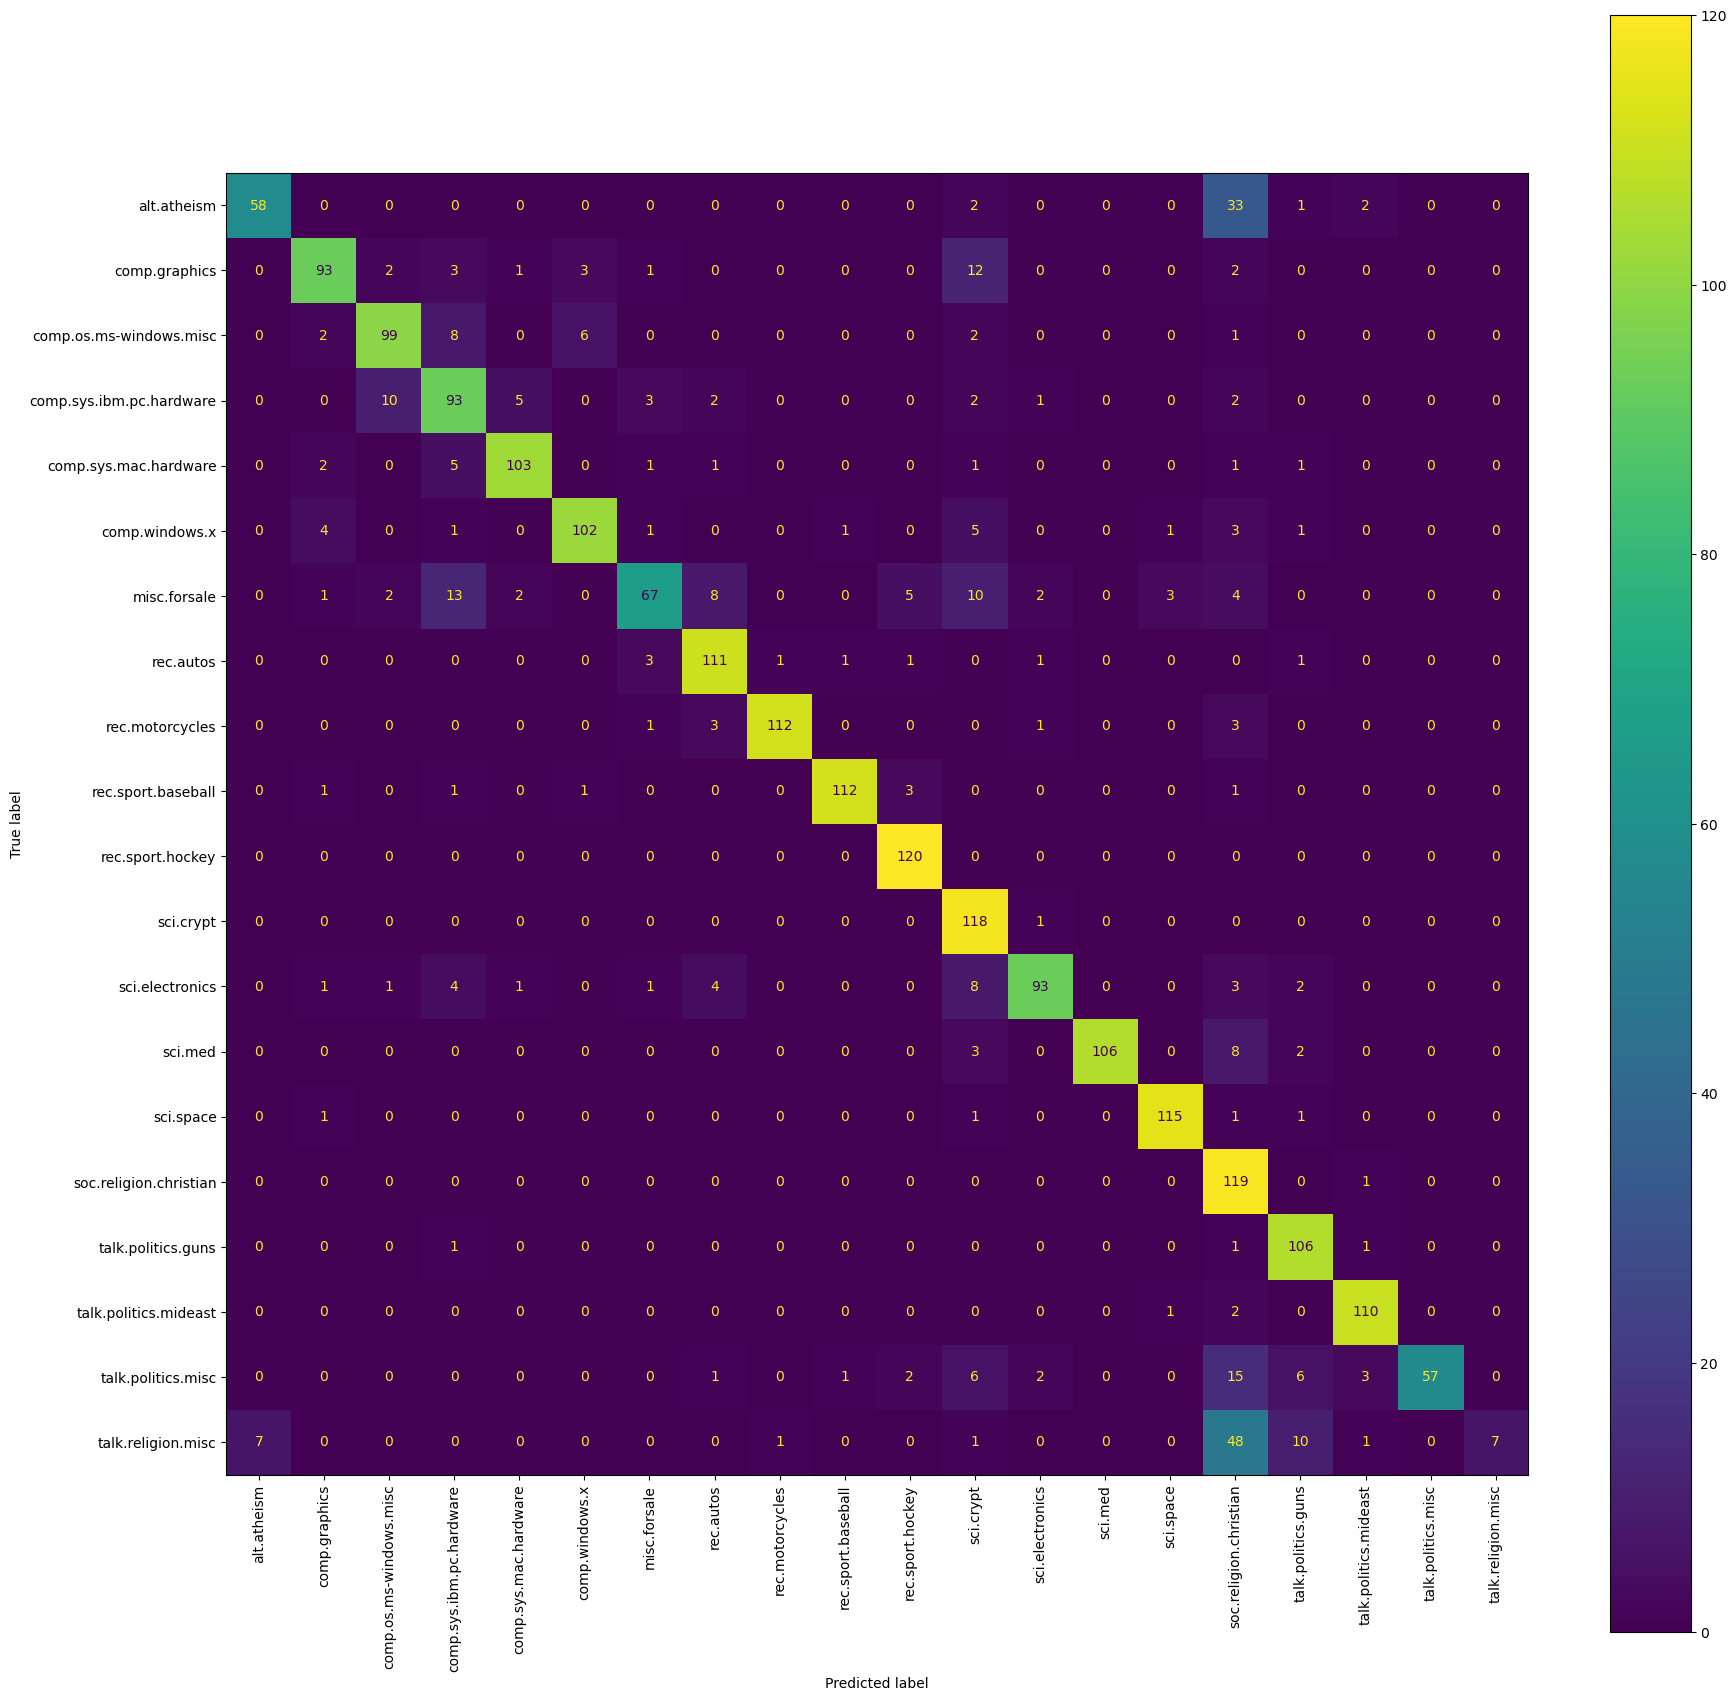

In [29]:
# Initalize our model.
model = MultinomialNB()


# Fit our model with our training data.
model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

# Evaluate our model
accuracy =  model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))


# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);


In [28]:
MultinomialNB?

Init signature:
MultinomialNB(
    *,
    alpha=1.0,
    force_alpha='warn',
    fit_prior=True,
    class_prior=None,
)
Docstring:     
Naive Bayes classifier for multinomial models.

The multinomial Naive Bayes classifier is suitable for classification with
discrete features (e.g., word counts for text classification). The
multinomial distribution normally requires integer feature counts. However,
in practice, fractional counts such as tf-idf may also work.

Read more in the :ref:`User Guide <multinomial_naive_bayes>`.

Parameters
----------
alpha : float or array-like of shape (n_features,), default=1.0
    Additive (Laplace/Lidstone) smoothing parameter
    (set alpha=0 and force_alpha=True, for no smoothing).

force_alpha : bool, default=False
    If False and alpha is less than 1e-10, it will set alpha to
    1e-10. If True, alpha will remain unchanged. This may cause
    numerical errors if alpha is too close to 0.

    .. versionadded:: 1.2
    .. deprecated:: 1.2
       The de

Model Accuracy: 0.906319
                          precision    recall  f1-score   support

             alt.atheism       0.94      0.91      0.92        96
           comp.graphics       0.84      0.88      0.86       117
 comp.os.ms-windows.misc       0.88      0.80      0.84       118
comp.sys.ibm.pc.hardware       0.81      0.80      0.80       118
   comp.sys.mac.hardware       0.89      0.89      0.89       115
          comp.windows.x       0.86      0.90      0.88       119
            misc.forsale       0.83      0.75      0.79       117
               rec.autos       0.93      0.87      0.90       119
         rec.motorcycles       0.94      0.97      0.96       120
      rec.sport.baseball       0.97      0.95      0.96       119
        rec.sport.hockey       0.94      0.98      0.96       120
               sci.crypt       0.97      0.94      0.96       119
         sci.electronics       0.85      0.84      0.84       118
                 sci.med       0.96      0.98     

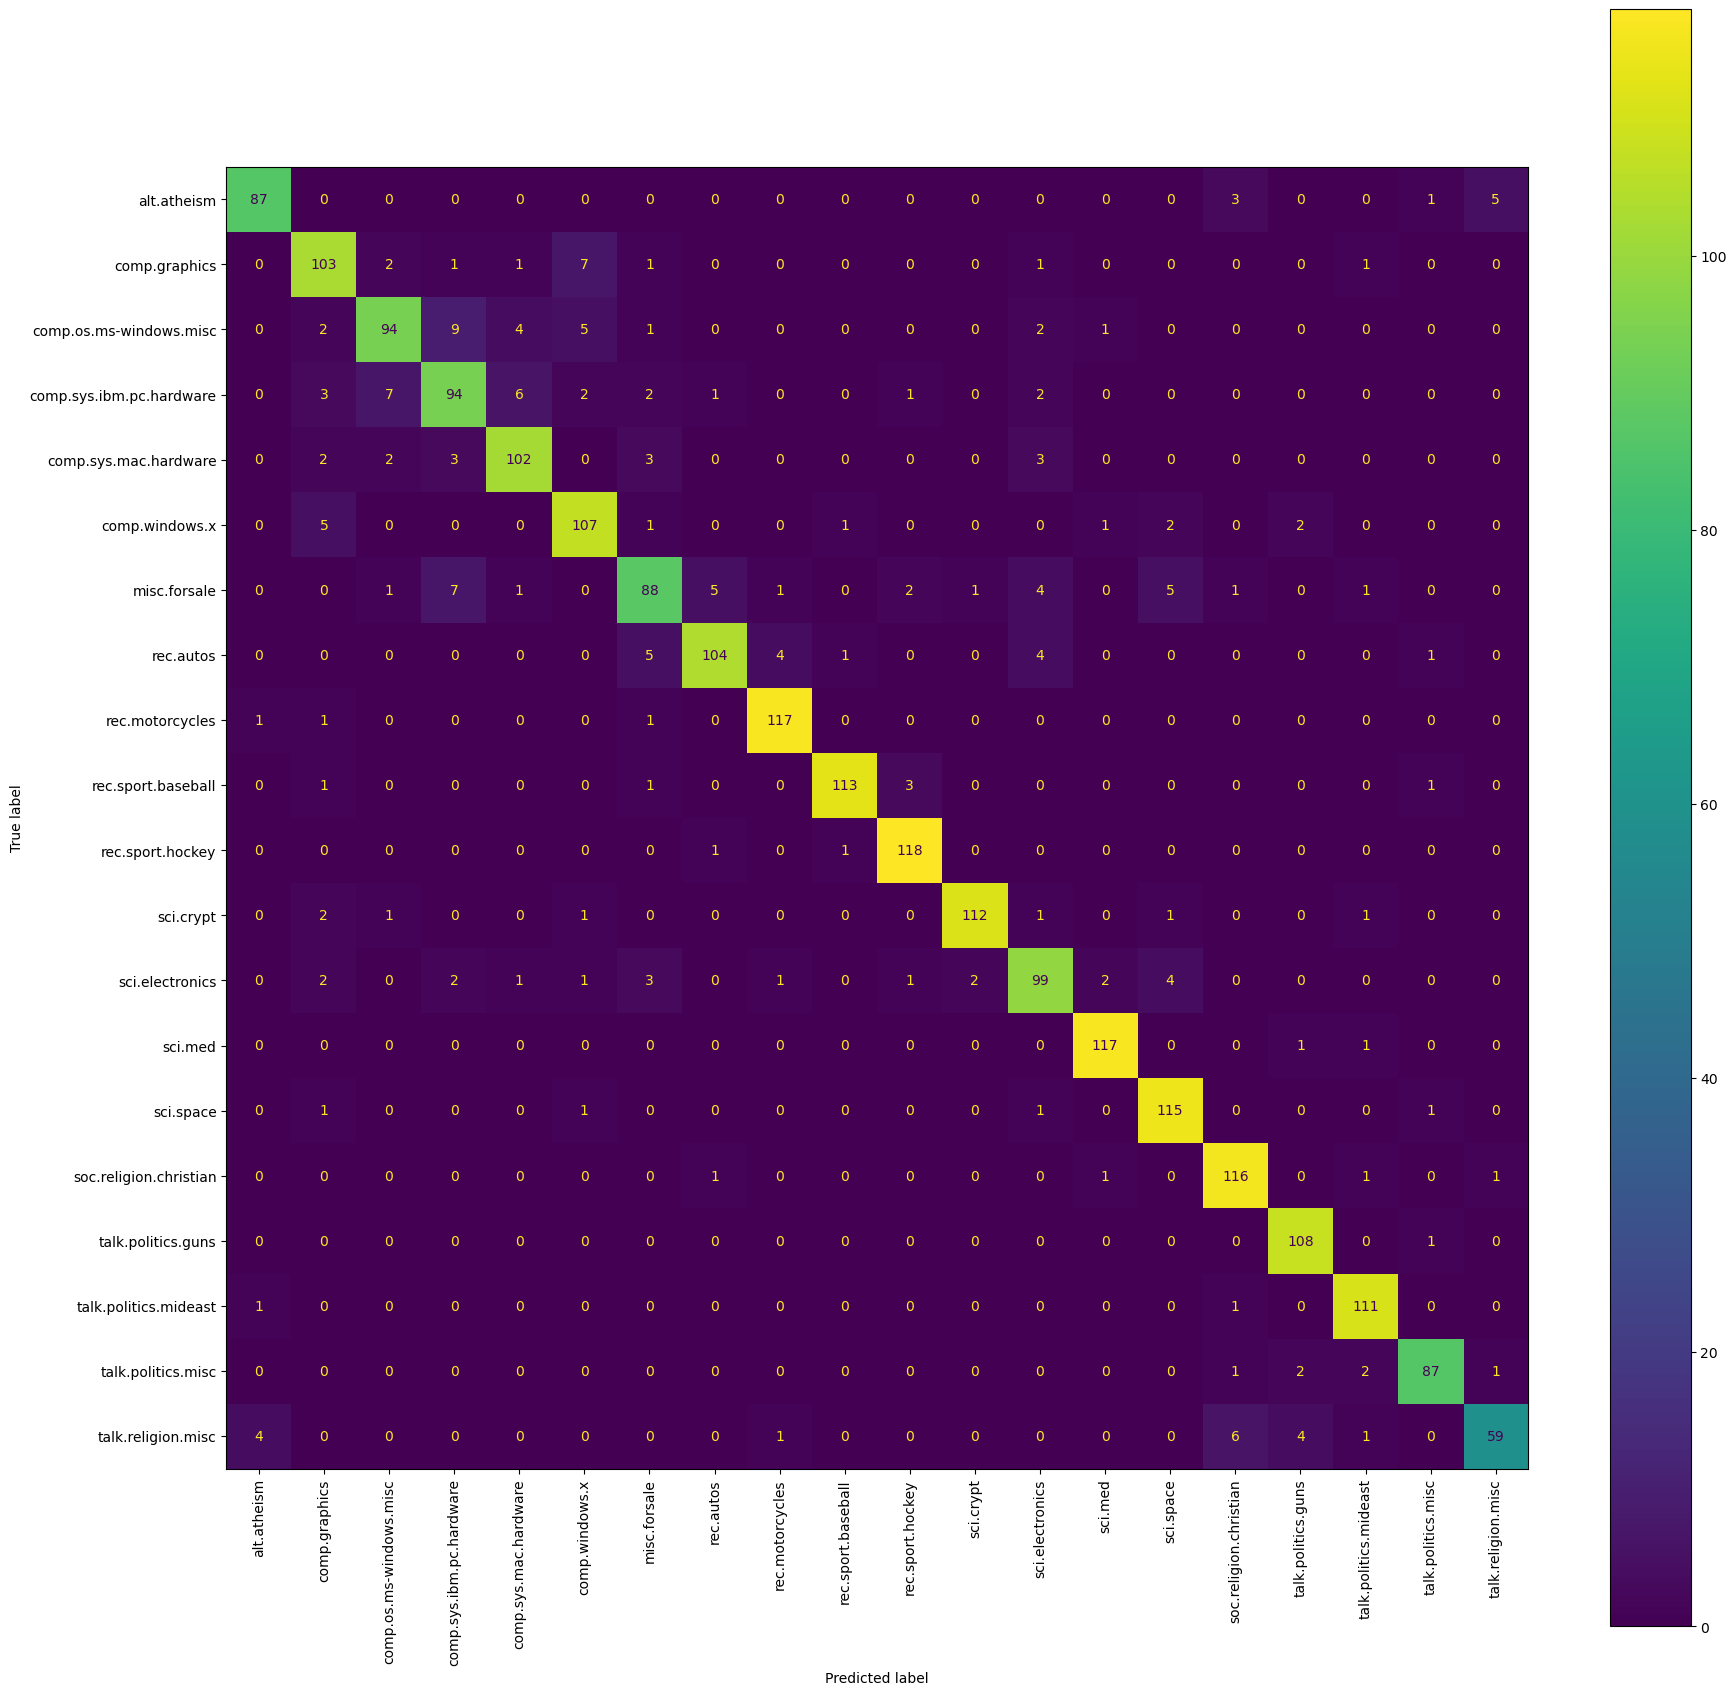

In [32]:
# Initalize our model.
model = MultinomialNB(alpha=.0001)


# Fit our model with our training data.
model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

# Evaluate our model
accuracy =  model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))


# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);


# Classifying a new piece of text

In [87]:
new_text = 'The yankees are winning saturday'

# Feature engineer the same way we did with our original data. 
new_text = text_pipeline(new_text)

# Sanity check
print(new_text)

# Turn the new_text into numbers using the vectorizer
# NOTE, must be passed in as a list.
# # NOTE, use just transform here, NOT FIT. 
new_text_vectorized = vectorizer.transform([new_text])
new_text_vectorized
# # make a new prediction using our model and vectorized text
model.predict(new_text_vectorized)

the yankees are winning saturday


array(['rec.sport.baseball'], dtype='<U24')

In [88]:
# Print the predicted probabilies for each class
pp = model.predict_proba(new_text_vectorized)
# Print probabilities for that predicition
for class_name, percentage in zip(model.classes_, pp.round(3)[0]):
    print(class_name, percentage )


alt.atheism 0.003
comp.graphics 0.002
comp.os.ms-windows.misc 0.001
comp.sys.ibm.pc.hardware 0.002
comp.sys.mac.hardware 0.001
comp.windows.x 0.002
misc.forsale 0.004
rec.autos 0.002
rec.motorcycles 0.004
rec.sport.baseball 0.796
rec.sport.hockey 0.112
sci.crypt 0.002
sci.electronics 0.002
sci.med 0.006
sci.space 0.005
soc.religion.christian 0.008
talk.politics.guns 0.008
talk.politics.mideast 0.008
talk.politics.misc 0.025
talk.religion.misc 0.006


# Lets see if Random Forest can do better...

In [89]:
# %%time
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(100)


# Fit our model with our training data.
rf_model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = rf_model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = rf_model.predict_proba(X_test)

# Evaluate our model
accuracy =  rf_model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

print(classification_report(y_test, y_pred, target_names=rf_model.classes_))

Model Accuracy: 0.817499
                          precision    recall  f1-score   support

             alt.atheism       0.89      0.68      0.77        96
           comp.graphics       0.59      0.76      0.66       117
 comp.os.ms-windows.misc       0.71      0.86      0.78       118
comp.sys.ibm.pc.hardware       0.70      0.68      0.69       118
   comp.sys.mac.hardware       0.81      0.76      0.78       115
          comp.windows.x       0.78      0.76      0.77       119
            misc.forsale       0.67      0.79      0.73       117
               rec.autos       0.89      0.82      0.86       119
         rec.motorcycles       0.96      0.89      0.92       120
      rec.sport.baseball       0.87      0.89      0.88       119
        rec.sport.hockey       0.88      0.96      0.92       120
               sci.crypt       0.94      0.94      0.94       119
         sci.electronics       0.84      0.64      0.73       118
                 sci.med       0.93      0.84     

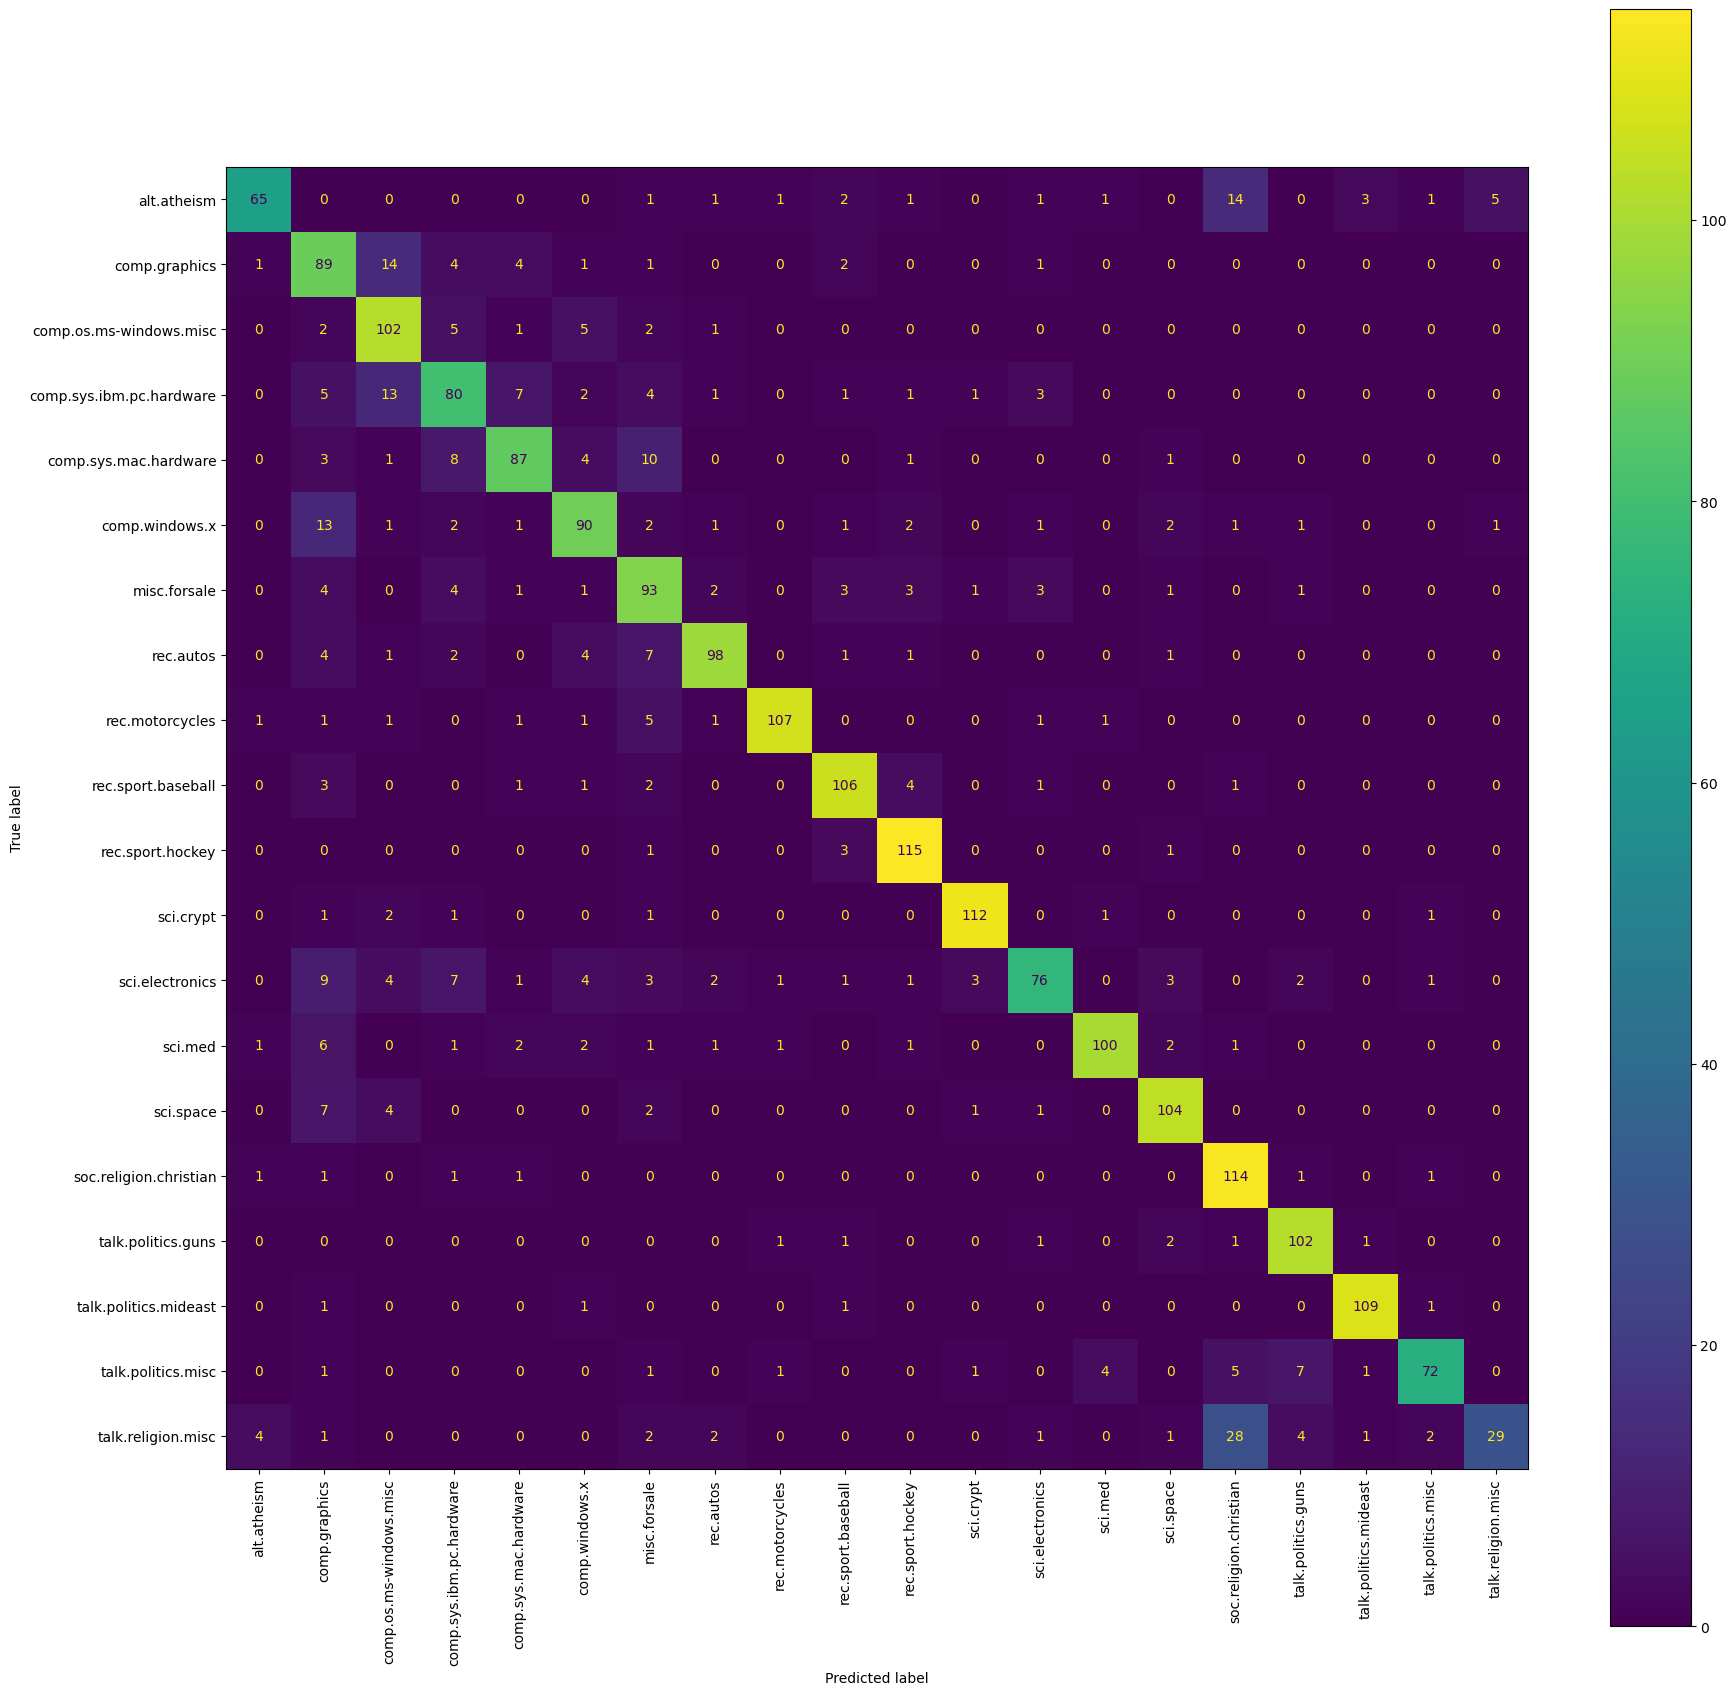

In [90]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);


/Users/zacharydesario/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:1381: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(9051, 235892)
Model Accuracy: 0.826779
                          precision    recall  f1-score   support

             alt.atheism       0.92      0.62      0.75        96
           comp.graphics       0.78      0.77      0.77       117
 comp.os.ms-windows.misc       0.78      0.67      0.72       118
comp.sys.ibm.pc.hardware       0.64      0.75      0.69       118
   comp.sys.mac.hardware       0.80      0.78      0.79       115
          comp.windows.x       0.79      0.78      0.79       119
            misc.forsale       0.81      0.67      0.73       117
               rec.autos       0.85      0.90      0.87       119
         rec.motorcycles       0.94      0.93      0.94       120
      rec.sport.baseball       0.96      0.92      0.94       119
        rec.sport.hockey       0.94      0.94      0.94       120
               sci.crypt       0.76      0.92      0.83       119
         sci.electronics       0.87      0.79      0.83       118
                 sci.med       0.96

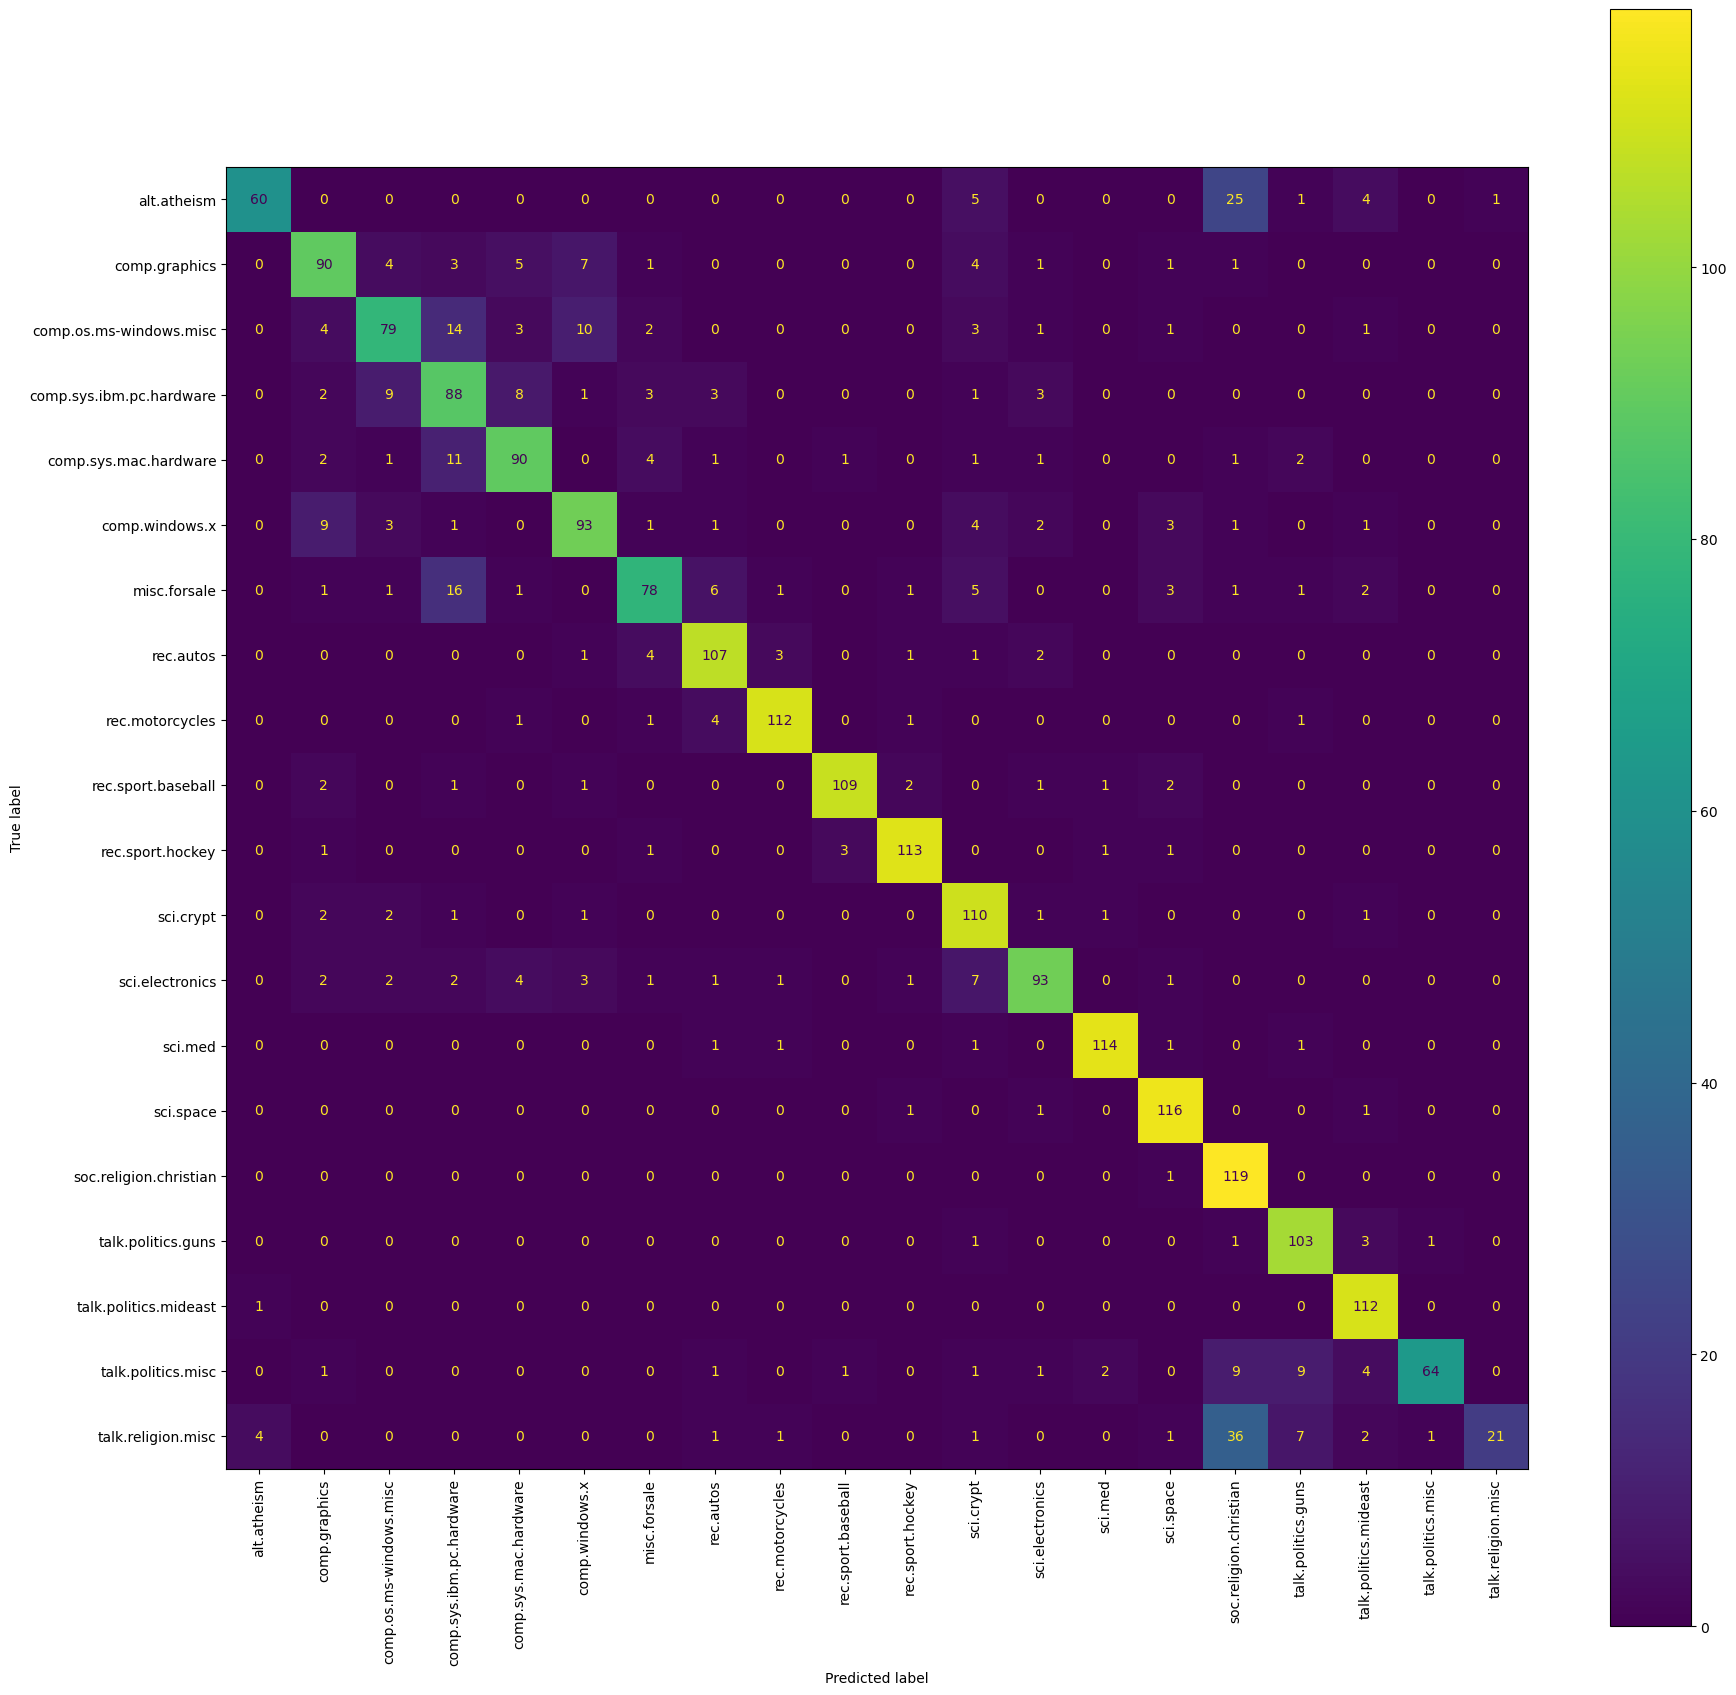

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define our `X` and `y` data. 

X = df['message_clean']

y = df['topic_category']

# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test


valid_english_vocab = set(nltk.corpus.words.words())


# Initialize our vectorizer
vectorizer = TfidfVectorizer(vocabulary=valid_english_vocab)

# This makes your vocab matrix
vectorizer.fit(X_train)

# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)


# Initalize our model.
model = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

# Evaluate our model
accuracy =  model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)


from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))

# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);



##  IF TIME, EXPLORATION: 
### Lets find some important words / just count all the words

In [74]:
# Inspecting our features


# getting all the words aka vocab out.
features = vectorizer.get_feature_names_out()

# extracting the idf weights
weights = vectorizer.idf_

# sanity check to make sure they match
print(len(features), len(weights))


# making them into a dataframe
df_idf = pd.DataFrame.from_dict( {'word': features, 'idf': weights})


# sorting them by their idf values
df_idf = df_idf.sort_values(by='idf', ascending=False)

df_idf


122023 122023


,word,idf
122022,úz,9.417594
65468,m26525a,9.417594
65476,m279p4u3vbs0tq5gpp3q3rb8grgr186a86,9.417594
65475,m2724ea05xtcax2c02c227m24g7xtextc,9.417594
65474,m270xww0w285w24f0gc24fxx6xxc0cxca4c0c,9.417594
...,...,...
109969,the,1.070715
87013,organization,1.040813
63293,lines,1.003209
47142,from,1.000000


In [75]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

counts = cv.fit_transform(X_test_text)

print(counts.shape)

counts_array = counts.toarray()



dfcounts = pd.DataFrame(counts_array, columns=cv.get_feature_names_out())
word_counts = dfcounts.sum(axis=0)
dfcounts = pd.DataFrame(word_counts).reset_index()
dfcounts.columns = ['word', 'word_count']
dfcounts.sort_values('word_count', ascending=False)



(2263, 51929)


,word,word_count
46587,the,29618
47067,to,14754
35216,of,14535
7769,and,11967
24648,in,10053
...,...,...
23499,hinge,1
23500,hinges,1
23501,hinn,1
23502,hinstance,1


<Axes: >

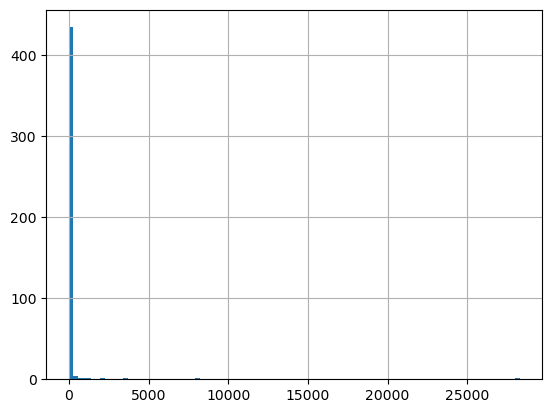

In [50]:
dfcounts.word_count.value_counts().hist(bins=100)

(5325, 2)


array([[<Axes: title={'center': 'word_count'}>]], dtype=object)

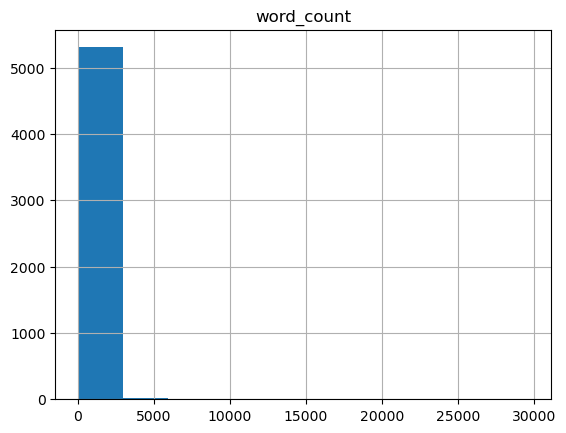

In [51]:
min_count = 10
print(dfcounts[dfcounts.word_count > min_count].shape)
dfcounts[dfcounts.word_count > min_count].hist()

(46136, 2)


array([[<Axes: title={'center': 'word_count'}>]], dtype=object)

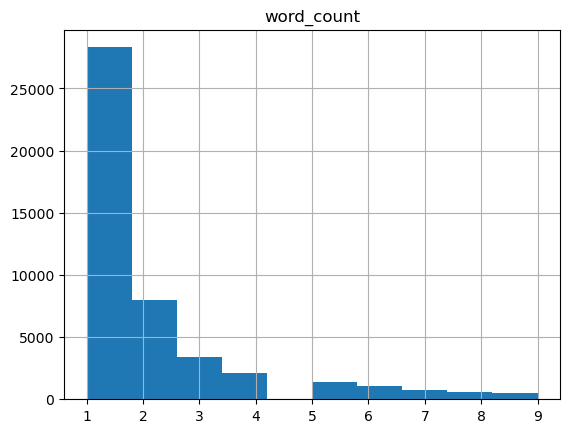

In [52]:
max_count = 10
print(dfcounts[dfcounts.word_count < max_count].shape)
dfcounts[dfcounts.word_count < max_count].hist()

In [111]:
# Remove all stopwords


ENGLISH_VOCAB = set(nltk.corpus.words.words())

def remove_non_english_words(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string.lower() )
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word in ENGLISH_VOCAB:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string
            
a_sentence = 'This is a sentence! With some different stopwords i have added in here.'
words = word_tokenize(a_sentence)

words

['This',
 'is',
 'a',
 'sentence',
 '!',
 'With',
 'some',
 'different',
 'stopwords',
 'i',
 'have',
 'added',
 'in',
 'here',
 '.']

In [112]:
remove_non_english_words(a_sentence)

'this is a sentence with some different i have added in here'

In [53]:
## THIS DOES NOT WORK, IDK WHY


def remove_invalid_words(input_string, valid_words):
    output_string = " ".join(w for w in nltk.wordpunct_tokenize(input_string) \
             if w.lower() in words or not w.isalpha())
    return output_string

a_sentence
remove_invalid_words(a_sentence, valid_words)



sent = "Io andiamo to the beach with my amico."
" ".join(w for w in nltk.wordpunct_tokenize(sent) \
         if w.lower() in words or not w.isalpha())
# 'Io to the beach with my'

10000 10000


,word,idf
9101,tnde7,9.417594
9997,zoroastrians,9.417594
7224,pubx11r5,9.417594
5224,larsons,9.417594
5348,liblibx11so,9.417594
...,...,...
8978,the,1.070715
6469,organization,1.040813
5394,lines,1.003209
8677,subject,1.000000


# Lets see if a Random Forest can do any better.

___
# When classifing a new piece of text.
For example, if we wanted to classify a totally new peice of text that was oustide of our training and testing data, what you must first do is feature engineer the new text the same way you did with your training text, and then transform the new text using the same vectorizer.

# Visualizing Feature Importances with _lime_

* might have to run `pip install lime`

In [ ]:
! pip install lime

In [36]:
# Learn more about making pipelines for NLP here
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_text_feature_extraction.html
from sklearn.pipeline import make_pipeline


# Create a pipeline, this is new to me but super cool. 
c = make_pipeline(vectorizer, rf_model)


# Get a list of the class names
class_names = list(rf_model.classes_)


# pick a random-ish doc
idx = 99
print(X_train_text[idx])


# Get predicited probas for that doc
pp = c.predict_proba([X_train_text[idx]])


# Print probabilities for that predicition
for class_name, percentage in zip(rf_model.classes_, pp.round(3)[0]):
    print(class_name, percentage )


from eliotlanmolaengrwashingtonedu eliot
subject re improvements in automatic transmissions
keywords saturn subaru manual automatic
articleid engrapr1904522119525
organization clearer than blir
lines 40
nntppostinghost lanmolaengrwashingtonedu


an excellent automatic can be found in the subaru legacy  it switches to
sport mode when the electronics figure it  not when the driver sets
the switch which is the proper way to do it imo  so what does sport
mode entail  several things

1 revving to red line or to the rev limiter in the case of the legacy

2 delayed upshifts  ie if you lift off briefly it will remain in the
	low gear  this is handy if you are charging through corners and
	would like to do without the distraction of upshifts when theres
	another curve approaching

3 part throttle downshifts based on the speed at which the pedal is
	depressed rather than the position of the pedal  modern
	electronics can measure this very easily and switch to sport mode
	this is wonderful if you

Document id: 99
[[0.  0.1 0.2 0.  0.1 0.  0.2 0.  0.1 0.2 0.1 0.  0.  0.  0.  0.  0.  0.
  0.  0. ]]
True class: autos


/var/folders/4w/4f8yp1td7l7_p77z3vdgy0dh0000gn/T/ipykernel_4833/965079795.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


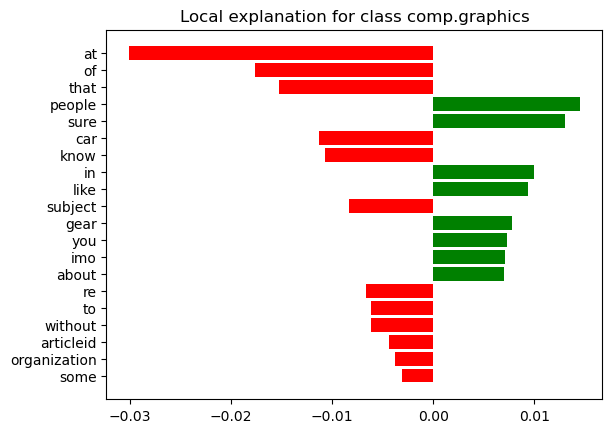

In [39]:

from lime.lime_text import LimeTextExplainer

class_names = list(rf_model.classes_)


# Make a new explainer 
explainer = LimeTextExplainer(class_names=class_names)


# Explain one doc
exp = explainer.explain_instance(X_train_text[idx], c.predict_proba, num_features=20)


text_string = 'I love cars and driving and hate guns.'

print('Document id: %d' % idx)
print(c.predict_proba([text_string]))
print('True class: %s' % 'autos')



# Plot the importances
fig = exp.as_pyplot_figure()

fig.show()
# Visualize the importances
exp.show_in_notebook(text=True)